# Лабораторная работа 3
### Выполнил: Бешляга Григорий Константинович


Добро пожаловать в третью лабораторную работу!
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках.
Где необходимо, используйте графики для большей наглядности.

При отправке поменяйте название файла на ваши ФИО!

### Настройка Google Colab

Подключение вашего гугл диска (советуем сохранять все важные артефакты именно на диск, чтобы они не удалились при закрытии вкладки с ноутбуком).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import json
# import os

# def download_contest3_data():
#   !mkdir ~/.kaggle # закоментить если ругается
#   !touch ~/.kaggle/kaggle.json # закоментить если ругается

#   # токен надо сгенерировать в личном кабинете на kaggle (https://www.kaggle.com/settings/account)
#   api_token = {"username":"samposebe","key":"2440ce0dfef47ef619f9d8226ecf772e"}
#   with open('/root/.kaggle/kaggle.json', 'w') as file:
#       json.dump(api_token, file)

#   !chmod 600 ~/.kaggle/kaggle.json

#   !kaggle competitions download -p /content/drive/MyDrive/ -c ml-mipt-2023-contest-3

#   if not os.path.isdir("/content/drive/MyDrive/contest3"):
#     !mkdir /content/drive/MyDrive/contest3

#   !unzip /content/drive/MyDrive/ml-mipt-2023-contest-3.zip -d /content/drive/MyDrive/contest3

# download_contest3_data()

### EDA (исследовательский анализ данных)

В этой лабораторной вы работаете с картинками. Напишите функцию, которая отрисовывала бы ключевые точки на конкретном изображении, это вам пригодится для дебага.
Можете посчитать статистики по картинкам в датасете.

In [ ]:
import numpy as np
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
def draw_image_with_points(csv_file_path, image_file, folder_path='/content/drive/MyDrive/contest3/images/images/train'):
  # Путь к папке с изображениями

  # Чтение CSV-файла
  data = pd.read_csv(csv_file_path)

  # image_file = data['file_name'][index]

  # Получаем ключевые точки из CSV-файла для текущего изображения
  key_points_data = data.loc[data['file_name'] == image_file, ['left_eye_x', 'left_eye_y',
                                                              'right_eye_x', 'right_eye_y',
                                                              'mouth_x', 'mouth_y',
                                                               'left_ear_1_x', 'left_ear_1_y',
                                                               'left_ear_2_x', 'left_ear_2_y',
                                                               'left_ear_3_x', 'left_ear_3_y',
                                                               'right_ear_1_x', 'right_ear_1_y',
                                                               'right_ear_2_x', 'right_ear_2_y',
                                                               'right_ear_3_x', 'right_ear_3_y']].values[0]
  left_eye_x, left_eye_y, right_eye_x, right_eye_y, mouth_x, mouth_y, left_ear_1_x, left_ear_1_y, left_ear_2_x, left_ear_2_y, left_ear_3_x, left_ear_3_y, right_ear_1_x, right_ear_1_y, right_ear_2_x, right_ear_2_y, right_ear_3_x, right_ear_3_y  = key_points_data

  # Отображаем изображение с ключевыми точками
  image_path = os.path.join(folder_path, image_file)
  image = Image.open(image_path)
  plt.imshow(image)
  plt.scatter(left_eye_x, left_eye_y, s=50, c='r', marker='o')  # Отображаем левый глаз
  plt.scatter(right_eye_x, right_eye_y, s=50, c='r', marker='o')  # Отображаем правый глаз
  plt.scatter(mouth_x, mouth_y, s=50, c='r', marker='o')  # Отображаем рот
  plt.scatter(left_ear_1_x, left_ear_1_y, s=50, c='r', marker='o')
  plt.scatter(left_ear_2_x, left_ear_2_y, s=50, c='r', marker='o')
  plt.scatter(left_ear_3_x, left_ear_3_y, s=50, c='r', marker='o')
  plt.scatter(right_ear_1_x, right_ear_1_y, s=50, c='r', marker='o')
  plt.scatter(right_ear_2_x, right_ear_2_y, s=50, c='r', marker='o')
  plt.scatter(right_ear_3_x, right_ear_3_y, s=50, c='r', marker='o')
  plt.show()



In [ ]:
annotations_file = '/content/train_labels_resized_2.csv'
image_file = '0026aaab27e1f6b62778df0b7900a06c.jpg'
folder_path = '/content/drive/MyDrive/images/train_resized'


In [ ]:
import shutil

# Путь к вашему файлу в Colab
source_file_path = 'train_labels_resized_2.csv'

# Путь к папке на Google Диске
destination_folder_path = '/content/drive/MyDrive/images'

# Копирование файла в папку на Google Диске
shutil.copy(source_file_path, destination_folder_path)

'/content/drive/MyDrive/images/train_labels_resized_2.csv'

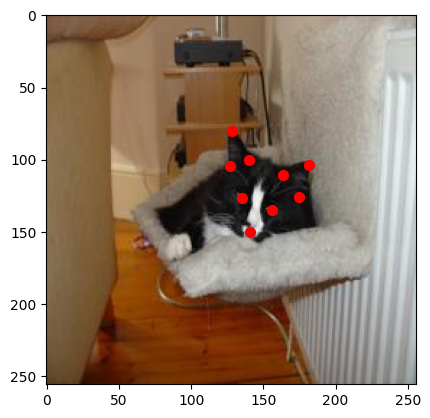

In [ ]:
draw_image_with_points(annotations_file, image_file,folder_path)

### Preprocessing (подготовка данных)

Мы ожидаем, что в этом разделе вы реализуете кастомный класс для подгрузки данных (cоветуем унаследоваться от `torch.utils.data.Dataset`).

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import os
from torchvision.io import read_image
from PIL import Image

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None, has_labels=True):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.has_labels = has_labels

        if self.has_labels:
            self.img_labels = pd.read_csv(annotations_file)
        else:
            self.image_files = os.listdir(img_dir)

    def __len__(self):
        return len(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        if self.has_labels:
            listdir = os.listdir(self.img_dir)
            file_name = listdir[idx]
            img_path = os.path.join(self.img_dir, file_name)

            row = self.img_labels[self.img_labels['file_name'] == file_name]
            label = torch.tensor(row.iloc[0, :-1].values.astype(float))
            # img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, -1])
            # label = torch.tensor(self.img_labels.iloc[idx, :-1])
        else:
            img_path = os.path.join(self.img_dir, self.image_files[idx])
            label = None

        image = read_image(img_path)

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        if self.has_labels:
          return image.float(), label.float()
        else:
          return image.float(), torch.empty(()).float()

Функция для изменения размера фотографий котят в новую папку с размером 256x256

In [ ]:
def resize_train_data(img_train_dir):
  df = pd.read_csv(annotations_file)

  folder_path = '/content/drive/MyDrive/images/train_resized'


  for filename in os.listdir(img_train_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Полный путь к файлу
        file_path = os.path.join(img_train_dir, filename)

        # Открытие изображения
        image = Image.open(file_path)
        image_size = image.size

        # Изменение размера изображения до 256x256
        resized_image = image.resize((256, 256))
        resized_image_size = resized_image.size

        x_change = resized_image_size[0] / image_size[0]
        y_change = resized_image_size[1] / image_size[1]

        row = df[df['file_name'] == filename]

        for column_name in row.columns.tolist():
            if column_name.endswith('x'):
                df.loc[df['file_name'] == filename, column_name] *= x_change
            elif column_name.endswith('y'):
                df.loc[df['file_name'] == filename, column_name] *= y_change

        # Сохранение измененного изображения
        resized_image.save(os.path.join(folder_path, filename))

  df.to_csv(os.path.join('/content/drive/MyDrive/images', 'train_labels_resized.csv'), index=False)




Вспомогательная функция для удаление файлов из папки

In [ ]:
# folder_path = '/content/drive/MyDrive/images/train_resized'
# lst = os.listdir(folder_path)
# for file_name in lst:
#   os.remove(os.path.join(folder_path,file_name))
# len(os.listdir(folder_path))

0

In [ ]:
resize_train_data('/content/drive/MyDrive/images/train')

Удаление фотографий из папки, которых нет в csv файле

In [ ]:
# import os
# import pandas as pd

# # Чтение CSV-файла и извлечение названий изображений
# csv_file_path = "/content/drive/MyDrive/images/train_labels_resized.csv"
# image_folder_path = "/content/drive/MyDrive/images/train_resized"

# data = pd.read_csv(csv_file_path)
# image_names_in_csv = data['file_name'].tolist()

# # Получение списка всех изображений в папке
# all_images = os.listdir(image_folder_path)

# # Удаление изображений, названия которых отсутствуют в CSV
# for image in all_images:
#     if image not in image_names_in_csv:
#         os.remove(os.path.join(image_folder_path, image))


In [ ]:
# len(os.listdir('/content/drive/MyDrive/images/train_resized'))

8995

Функция сжатия картинок в тестовой папке, создание словарика с коэффициэнтами сжатия

In [ ]:
def resize_test_data(img_train_dir):

  folder_path = '/content/drive/MyDrive/contest3/images/images/test_resized'

  dict_koefs = {}

  for filename in os.listdir(img_train_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Полный путь к файлу
        file_path = os.path.join(img_train_dir, filename)

        # Открытие изображения
        image = Image.open(file_path)
        image_size = image.size

        # Изменение размера изображения до 256x256
        resized_image = image.resize((256, 256))
        resized_image_size = resized_image.size

        x_change = resized_image_size[0] / image_size[0]
        y_change = resized_image_size[1] / image_size[1]

        koefs = []
        koefs.append(x_change)
        koefs.append(y_change)

        dict_koefs[filename] = koefs

        # row = df[df['file_name'] == filename]

        # for column_name in row.columns.tolist():
        #     if column_name.endswith('x'):
        #         df.loc[df['file_name'] == filename, column_name] *= x_change
        #     elif column_name.endswith('y'):
        #         df.loc[df['file_name'] == filename, column_name] *= y_change

        # Сохранение измененного изображения
        # resized_image.save(os.path.join(folder_path, filename))

  return dict_koefs


In [ ]:
# resize_train_data(img_train_dir, annotations_file) # ресайзим тренировочные данные

In [ ]:
img_test_dir = '/content/drive/MyDrive/images/test'

In [ ]:
dict_koefs = resize_test_data(img_test_dir) # ресайзим тестовые данные и кладем коэффициенты ресайза в словарик

Сохранение словарика с коэффициэнтами в файл .pkl

In [ ]:
# import pickle

# with open('/content/drive/MyDrive/contest3/dict_koefs.pkl', 'wb') as f:
#     pickle.dump(dict_koefs, f)

# # with open('dictionary.pkl', 'rb') as f: # потом извлекаем словарик
# #     my_dict = pickle.load(f)

Функция разделения трейн выборки на тестовую и валидационную

In [ ]:
from sklearn.model_selection import train_test_split
import random

def split_train_data():
  # Путь к папке с изображениями
  folder_path = '/content/drive/MyDrive/images/train_resized'

  # Получение списка имен файлов из папки
  file_names = os.listdir(folder_path)

  # Перемешивание списка имен файлов
  random.shuffle(file_names)

  # Разделение на тренировочную и валидационную выборки
  train_files, val_files = train_test_split(file_names, test_size=0.1, random_state=42)

  # Перемещение файлов в соответствующие папки
  train_folder = folder_path # оставляем в этой же папке
  val_folder = "/content/drive/MyDrive/images/val_resized"

  for file_name in train_files:
      src = os.path.join(folder_path, file_name)
      dst = os.path.join(train_folder, file_name)
      os.rename(src, dst)

  for file_name in val_files:
      src = os.path.join(folder_path, file_name)
      dst = os.path.join(val_folder, file_name)
      os.rename(src, dst)

In [ ]:
split_train_data()

In [ ]:
len(os.listdir('/content/drive/MyDrive/images/val_resized'))

900

Функция, применяющая коэффициенты сжатия к данным в csv файле

In [ ]:
def mult_preds(preds_df, dict_koefs): # функция возвращающая предсказания к начальным координатам

  for index, row in preds_df.iterrows():
    x_change = dict_koefs[row['file_name']][0]
    y_change = dict_koefs[row['file_name']][1]

    for column_name, _ in row.iteritems():
        if column_name.endswith('x'):
            preds_df.at[index, column_name] /= x_change
        elif column_name.endswith('y'):
            preds_df.at[index, column_name] /= y_change

  return preds_df


### Training/evaluation loop

В этом разделе напишите функцию, принимающую модель, оптимизатор, кол-во эпох, и т.д, которая осуществляет обучение с заданными параметрами. Подумайте, что функция будет возвращать.

Смысл этого раздела в том, чтобы не дублировать код обучения для каждого эксперимента. А еще на такую функцию легко накинуть перебор гиперпараметров...

Функция создания тензора для нейросети из данных csv файла

In [ ]:
def get_val_tensor(img_dir, annotations_file):
  df = pd.read_csv(annotations_file)

  listdir = os.listdir(img_dir)

  val_tensor = torch.empty(0, 18)

  for file_name in listdir:
    row = df[df['file_name'] == file_name].iloc[0, :-1]
    row_tensor = torch.tensor(row.values.astype(float))
    val_tensor = torch.cat((val_tensor, row_tensor.unsqueeze(0)), dim=0)

  return val_tensor

Функция тренировки нейросети

In [ ]:
from IPython import display
from tqdm import tqdm
from datetime import datetime

def training(net, n_epochs, optimizer, scheduler, criterion, dataloader):
  loss_history = []
  val_loss_history = []
  val_tensor = get_val_tensor('/content/drive/MyDrive/images/val_resized',
                          '/content/drive/MyDrive/images/train_labels_resized.csv')

  for i in range(n_epochs):
    progress_bar = tqdm(dataloader, desc=f'Epoch {i+1}/{n_epochs}', unit='batch')
    for x_batch, y_batch in progress_bar:

      # x_batch, y_batch = x_batch.to('cuda'), y_batch.to('cuda')
      predictions = net(x_batch)
      loss = criterion(predictions.squeeze(), y_batch.squeeze())

      loss.backward()

      optimizer.step()
      optimizer.zero_grad()
      # scheduler.step(loss)

      loss_history.append(loss.item())

    scheduler.step(loss)
    now = datetime.now()
    current_date_time = now.strftime("%Y-%m-%d %H:%M:%S")
    file_name = "net_parameters_" + current_date_time

    preds = predict_values(net, '/content/drive/MyDrive/images/val_resized')

    loss_fn = nn.L1Loss()

    l1_loss = loss_fn(val_tensor.squeeze(), preds.squeeze())
    val_loss_history.append(l1_loss.item())

    # Сохраните параметры модели в файл
    torch.save(net.state_dict(), os.path.join('/content/drive/MyDrive/images', file_name))


  plt.figure(figsize=(8,6))

  plt.title("Training loss")
  plt.xlabel("#iteration")
  plt.ylabel("loss")
  plt.plot(loss_history, 'b')
  plt.show()

  print('Current loss: %f' % loss)

  return sum(val_loss_history) / len(val_loss_history)

In [ ]:
# ?scheduler.step

Копируем часть данных в другую папку для более маленькой выборки

In [ ]:
# import shutil

# folder_path = '/content/drive/MyDrive/contest3/images/images/train_resized_part'

# listdir = os.listdir('/content/drive/MyDrive/contest3/images/images/train_resized')
# i = 0
# for file_name in listdir:
#   if i < 800:
#     source_file_path = os.path.join('/content/drive/MyDrive/contest3/images/images/train_resized', file_name)
#     shutil.copy(source_file_path, folder_path)
#   i += 1


In [ ]:
# folder_path = '/content/drive/MyDrive/contest3/images/images/train_resized_part'
# listdir = os.listdir(folder_path)

# for file_name in listdir:
#   os.remove(os.path.join(folder_path, file_name))

### Prediction function

Реализуйте функцию, которая бы делала предсказания. Функция принимает датасет/даталоадер и модель (мб еще что-то). Эта функция нужна вам, чтобы было удобнее считать метрику (по сути она будет склеивать предсказания из батчей в один массив).

In [ ]:
def predict_values(net, img_dir):
  # Загрузка тестового датасета с использованием класса CustomImageDataset

  test_dataset = CustomImageDataset(annotations_file=None,
                                    img_dir=img_dir,
                                    has_labels=False)

  # Создание дата-лоадера для тестового датасета
  test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

  # Перевод модели в режим оценки (evaluation mode)
  net.eval()

  # Цикл по тестовым данным
  predictions = []
  for inputs, _ in test_dataloader:
      # Передача данных через модель для получения предсказаний
      outputs = net(inputs)
      predictions.append(outputs.detach().numpy())

  # Объединение предсказаний в один массив
  predictions = np.concatenate(predictions, axis=0)

  # Вывод предсказаний
  return torch.tensor(predictions)


### Experiments

В этом разделе задаете архитектуры моделей и ставите эксперименты по обучению. Мы ожидаем, что вы зададите модель в виде класса (унаследуетесь от класса `torch.nn.Module`).

Если вы ставили много экспериментов, приведите их в хронологическом порядке, чтобы мы увидели эволюцию ваших рассуждений.

Мы ожидаем увидеть графики train/val лоссов и метрик для ваших экспериментов. Мы ожидаем увидеть визуализацию примеров предсказаний.

In [ ]:
import torch.nn as nn

Первый образец архитектуры нейросети

In [ ]:
# class MyNet(nn.Module):
#     def __init__(self):
#       super(MyNet, self).__init__()

#       self.model = nn.Sequential(
#         nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2, stride=2),
#         nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2, stride=2),
#         nn.Flatten(),
#         nn.Linear(131072, 128),
#         nn.ReLU(),
#         nn.Linear(128, 18)
#         )

#     def forward(self, x):
#         x = self.model(x)
#         return x

Второй образец архитектуры нейросети

In [ ]:
import torch.nn.functional as F
class MyNet(nn.Module):
    def __init__(self, use_batch_norm, use_dropout, dropout_rate):
        super(MyNet, self).__init__()

        layers = [
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(131072, 128),
            nn.ReLU(),
            nn.Linear(128, 18)
        ]

    # Третий образец архитектуры нейросети
    # def __init__(self, num_keypoints=18):
    #     super(MyNet, self).__init__()
    #     self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
    #     self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
    #     self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    #     self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    #     self.fc1 = nn.Linear(65536, 128)
    #     self.fc2 = nn.Linear(128, 64)
    #     self.fc3 = nn.Linear(64, num_keypoints)

    # def forward(self, x):
    #     x = self.pool(F.relu(self.conv1(x)))
    #     x = self.pool(F.relu(self.conv2(x)))
    #     x = self.pool(F.relu(self.conv3(x)))
    #     x = x.view(x.size(0), -1)
    #     x = F.relu(self.fc1(x))
    #     x = F.relu(self.fc2(x))
    #     x = self.fc3(x)
    #     return x

        if use_batch_norm:
            layers.insert(3, nn.BatchNorm2d(16))
            layers.insert(7, nn.BatchNorm2d(32))

        if use_dropout:
            layers.insert(4, nn.Dropout(dropout_rate))
            layers.insert(9, nn.Dropout(dropout_rate))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

Эксперимент 1

В качестве первого эксперимента я взял обычные данные из обычного csv файла без изменения ключевых точек при сжатии для того чтобы просто сработало хотя бы один раз

Итог: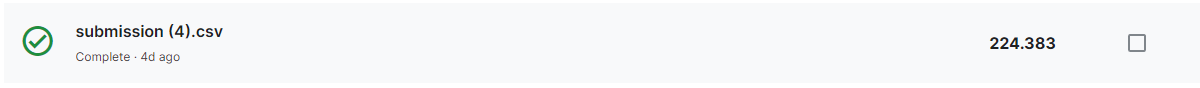

Эксперимент 2

Затем мы проведем операцию по сжатию коэффициентов в csv файле и равномерной интерпретацией csv коэффициентов при сжатии/разжатии

Итог: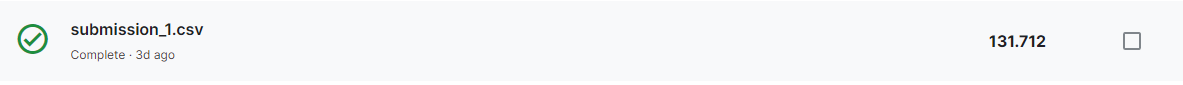

Эксперимент 3

Подкрутим оптуну и подберем гиперпараметры для шедулера step-size, gamma и для оптимайзера learning_rate Шедулер: StepLR

Итог: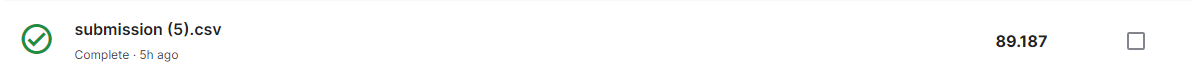

Эксперимент 4

Потестим batch_norm и drop_out в архитектуре и уберем шедулер

Итог: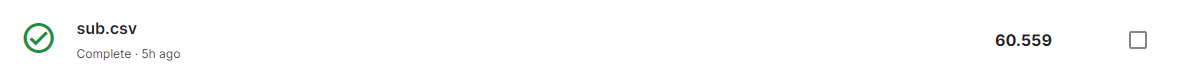

Эксперимент 5

Потестим новый шедулер ReduceLROnPlateau

Итог: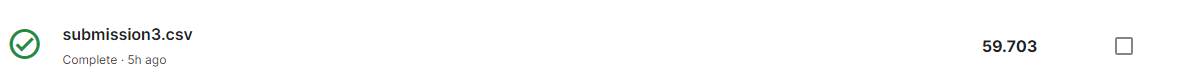

Эксперимент 6

Лучший результат на валидационных данных следующие гиперпараметры
Trial 2 finished with value: 32.49587462785411 and parameters: {'lr': 0.014099295726490506, 'use_batch_norm': True, 'use_dropout': True, 'dropout_rate': 0.39685039612576917}. Best is trial 1 with value: 25.723883164577163.
Current loss: 27.248844
32.49587462785411

Итог: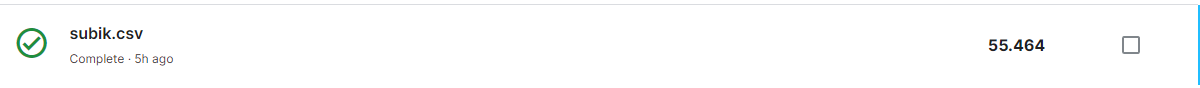

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
new_annotations_file = '/content/drive/MyDrive/images/train_labels_resized.csv'
new_img_train_dir = '/content/drive/MyDrive/images/train_resized'
train_dataset = CustomImageDataset(annotations_file=new_annotations_file,
                                   img_dir=new_img_train_dir)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

In [ ]:
!pip install optuna

In [ ]:
import optuna

In [ ]:
torch.cuda.is_available()

Тестер и обучатор нейронной сети с подбором гиперпараметров через оптуну

In [ ]:
# def objective(trial):
    # step_size = trial.suggest_int('step_size', 1, 10)
    # lr = trial.suggest_float('lr', 1e-6, 1e-3, log=True)
    # gamma = trial.suggest_float('gamma', 0.1, 0.9)
    # n_epochs = 1
    # n_blocks = trial.suggest_int('n_blocks', 0, 3)
    # use_batch_norm = trial.suggest_categorical('use_batch_norm', [True, False])
    # use_dropout = trial.suggest_categorical('use_dropout', [True, False])
    # dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


    # net = MyNet()
    # optimizer = optim.Adam(net.parameters(), lr=lr)
    # criterion = nn.L1Loss()
    # scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)
    # dataloader = train_dataloader

    # device = 'cuda'
    # net.to(device);

    # mean_val_loss = training(net, n_epochs, optimizer, scheduler, criterion, dataloader)
    # print(mean_val_loss)
    # net.to('cpu');
    # return mean_val_loss
n_epochs = 3
net = MyNet(True,False,0.022958973342980915)
optimizer = optim.Adam(net.parameters(), lr=0.0009408841445514494)
criterion = nn.L1Loss()
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, threshold=1e-4, cooldown=0, min_lr=0, eps=1e-8, verbose=False)
dataloader = train_dataloader

# device = 'cuda'
# net.to(device);

mean_val_loss = training(net, n_epochs, optimizer,scheduler, criterion, dataloader)
print(mean_val_loss)
net.to('cpu');
# return mean_val_loss

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=10)

# study.best_params

In [ ]:
img_test_dir = '/content/drive/MyDrive/images/test_resized'
preds = predict_values(net, img_test_dir) # предсказываем значения в новых координатах

In [ ]:
def transform_and_save_preds(preds, dict_koefs):
  answer = pd.DataFrame(preds)
  new_column = pd.DataFrame(os.listdir(img_test_dir))
  answer['file_name'] = new_column

  df = pd.read_csv('/content/drive/MyDrive/images/train_labels.csv') # берем этот датафрейм для корректных названий столбцов
  columns = df.columns
  answer.columns = columns
  normal_answer = mult_preds(answer, dict_koefs)

  normal_answer.to_csv('submission.csv', index=False)

In [ ]:
transform_and_save_preds(preds, dict_koefs)

### Evaluation  (оценка качества модели)

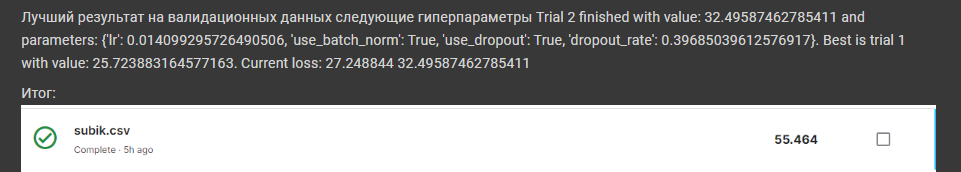

### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы.
Что получилось / не получилось и почему?

Бейзлайн не пройден, но заниматься лабораторной было интересно. Самым сложным в работе была работа с гугл колабом и диском, а также с файловой системой папок, обработкой изображений и csv файлов, возникал миллиард ошибок. Это заняло 2-3 дня чтобы добраться непосредственно до построения и обучения нейросетей. Обучение нейросети тоже прошло не без проблем. Самым грустным было то, что после обучения 1-2 часа нейросети она падала из-за гугл колаба, дропа интернета и т.д, но для этого можно было использовать сохранения нейросети на различных этапах.